# Market Data

In [35]:
# Import packages

# Data Frames
import pandas as pd

# Financial Data 
import yfinance as yf # pip install yfinance

# Dates and Times
import datetime as dt

# Plotting
import matplotlib.pyplot as plt
import mplfinance as mpf # pip install mplfinance

In [65]:
# Set ticker and get historical data for past 6 months.
ticker = 'AAPL'
market_data = yf.download(ticker, period='6mo', multi_level_index=False)
market_data

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2024-06-27,213.617462,215.253765,211.871406,214.206129,49772700
2024-06-28,210.145279,215.583007,209.826008,215.283680,82542700
2024-07-01,216.261475,217.019756,211.442359,211.611974,60402900
2024-07-02,219.773544,219.883297,214.615199,215.662820,58046200
2024-07-03,221.050659,221.050659,218.536335,219.504150,37369800
...,...,...,...,...,...
2024-12-20,254.490005,255.000000,245.690002,248.039993,147495300
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700


In [66]:
market_data.describe()

,Close,High,Low,Open,Volume
count,128.000000,128.000000,128.000000,128.000000,1.280000e+02
mean,228.640658,230.395262,226.266680,228.203988,4.947664e+07
std,10.496091,10.263141,10.808919,10.510723,2.949030e+07
min,206.762939,209.516729,195.558244,198.641276,9.888202e+06
25%,222.375343,225.066773,220.705907,222.337884,3.690375e+07
50%,226.945168,228.809160,224.722758,227.015097,4.424775e+07
75%,232.527157,233.335753,229.625550,232.476725,5.332138e+07
max,259.019989,260.100006,257.630005,258.190002,3.186799e+08


In [67]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2024-06-27 to 2024-12-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   128 non-null    float64
 1   High    128 non-null    float64
 2   Low     128 non-null    float64
 3   Open    128 non-null    float64
 4   Volume  128 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [68]:
# Timestamp the filename

# Get the current date and time.
filename = dt.datetime.now()
# Create a string format from the current date and time.
filename = filename.strftime("_%Y%m%d_%H%M%S") 
# Prepend data folders, append file extension.
filename = 'data/' + ticker + filename + ".csv"

# Show the filename.
filename

'data/AAPL_20241227_155922.csv'

In [69]:
# Save the data to a CSV file.
market_data.to_csv(filename)

## Plotting Market Data for the specified Ticker ##

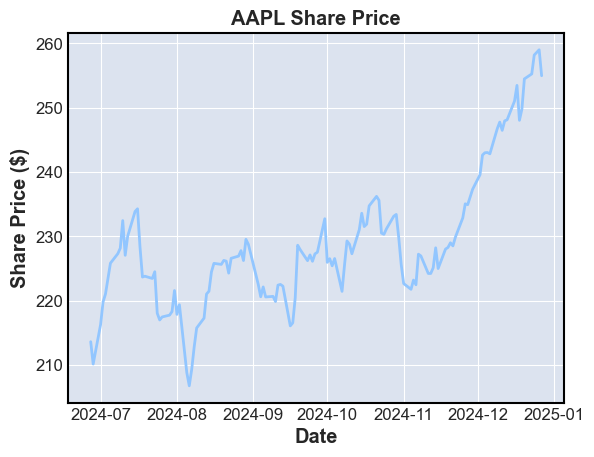

In [70]:
# Plot the Closing prices

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title(ticker + " Share Price", weight='bold')

# Axis labels.
ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('Share Price ($)', weight ='bold')

# Generate plot
ax.plot(market_data["Close"])

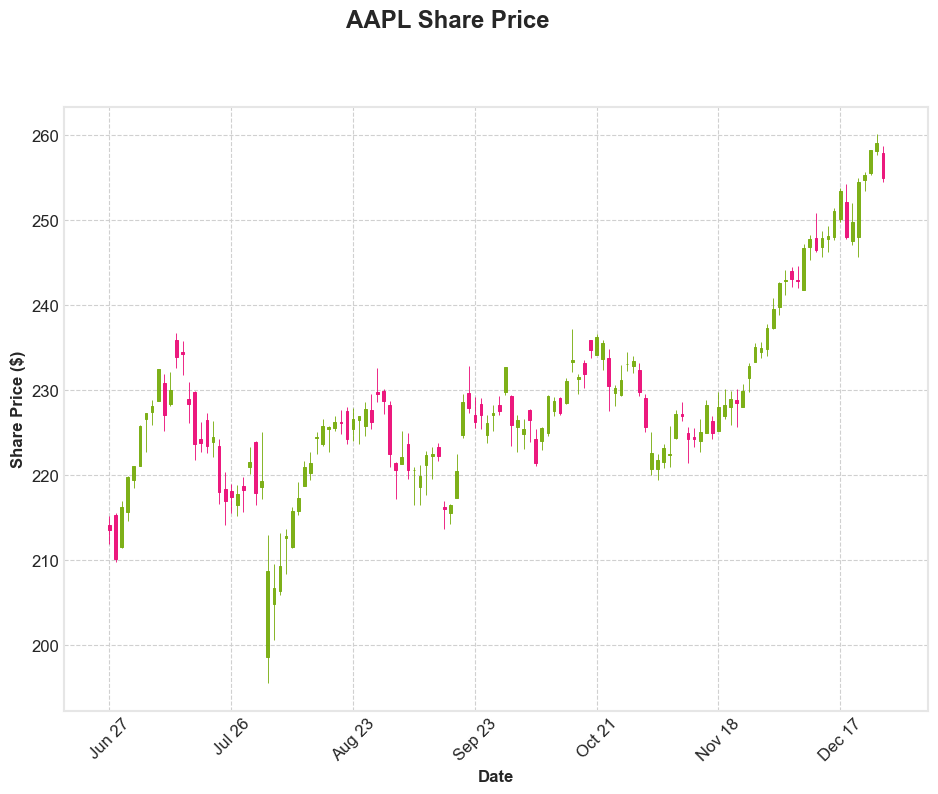

In [92]:
mpf.plot(market_data, type='candle', style='binance', figscale=1.5, 
         title=ticker + " Share Price", ylabel='Share Price ($)', xlabel='Date')
# https://github.com/matplotlib/mplfinance#tutorials
# Initially exxperienced as error due to multi-column names. Set this parameter to False during the download:
# https://stackoverflow.com/questions/79133206/mplfinance-error-data-for-column-open-must-be-all-float-or-int
# https://plainenglish.io/blog/plot-stock-chart-using-mplfinance-in-python-9286fc69689

## End